# Population Regresion

## 1.platform

| Category     | Details            |
|--------------|--------------------|
| Language     | Python 3.12.1      |
| Editor       | VSCode + Anaconda  |
| coding       | utf - 8            |
| system       | windows 11         |


## 2.code implementation

### Singapore
data resource:<https://www.singstat.gov.sg>

#### 1）Import Libraries and Load Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import platform

# 自动设置字体，兼容Windows和Mac
if platform.system() == 'Windows':
    matplotlib.rcParams['font.family'] = ['SimHei']
elif platform.system() == 'Darwin':
    matplotlib.rcParams['font.family'] = ['PingFang SC']
else:
    matplotlib.rcParams['font.family'] = ['sans-serif']

matplotlib.rcParams['axes.unicode_minus'] = False
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# =========================
# 1. 数据读取与预处理
# =========================

# 跳过前面无关的行，找到数据起始行
with open('Singapore.csv', encoding='utf-8') as f:
    for idx, line in enumerate(f):
        if line.startswith('Data Series'):
            data_start = idx 
            break


# 读取数据，只保留“年份”和“总人口”两列
df = pd.read_csv('Singapore.csv', skiprows=data_start+1)
df = df.rename(columns={df.columns[0]: 'Year', df.columns[1]: 'Total_Citizen'})
df = df[['Year', 'Total_Citizen']]


# 去除空行和非数字年份
df = df[df['Year'].apply(lambda x: str(x).strip().isdigit())]
df['Year'] = df['Year'].astype(int)
df['Total_Citizen'] = pd.to_numeric(df['Total_Citizen'], errors='coerce')
df = df.dropna()

#### 2）Data Visualization

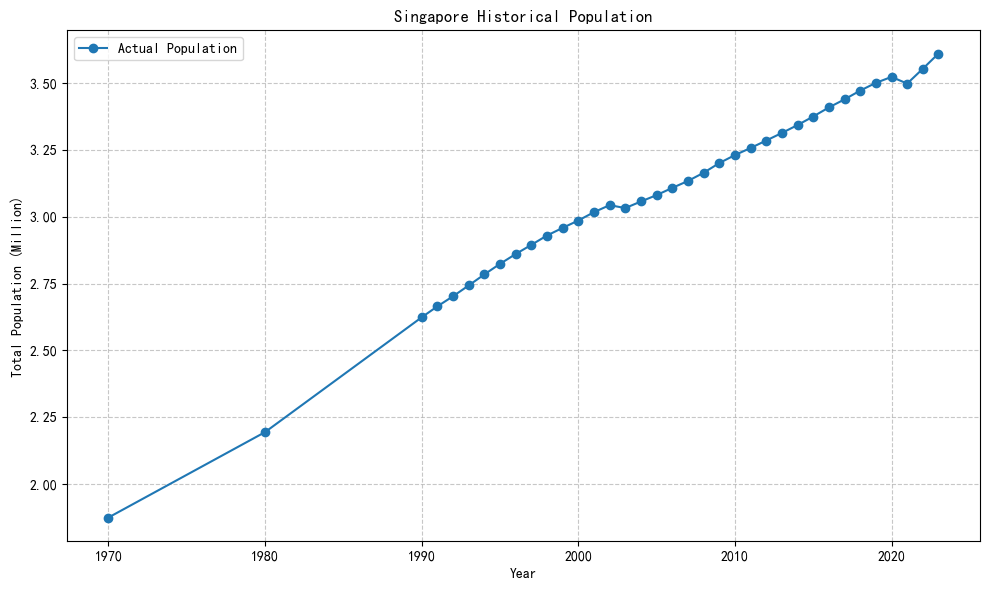

In [15]:
# =========================
# 2. 数据可视化
# =========================

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total_Citizen'] / 1e6, marker='o', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('Total Population (Million)')
plt.title('Singapore Historical Population')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### 3）Linear Regression Model
Split data into training (<=2020) and testing (>2020)
Prepare features (Year) and target (Population)
Create and train linear regression model

In [16]:
# =========================
# 3. 构建线性回归模型（使用2020年及以前数据）
# =========================

train_df = df[df['Year'] <= 2020]
test_df = df[df['Year'] > 2020]

X_train = train_df['Year'].values.reshape(-1, 1)
y_train = train_df['Total_Citizen'].values
X_test = test_df['Year'].values.reshape(-1, 1)
y_test = test_df['Total_Citizen'].values

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 4）Performance evaluation of the training set

Best fit line slope: 31246.20
Best fit line intercept: -59560702.75
Training R²: 0.9854
Training MSE: 1847086279.98


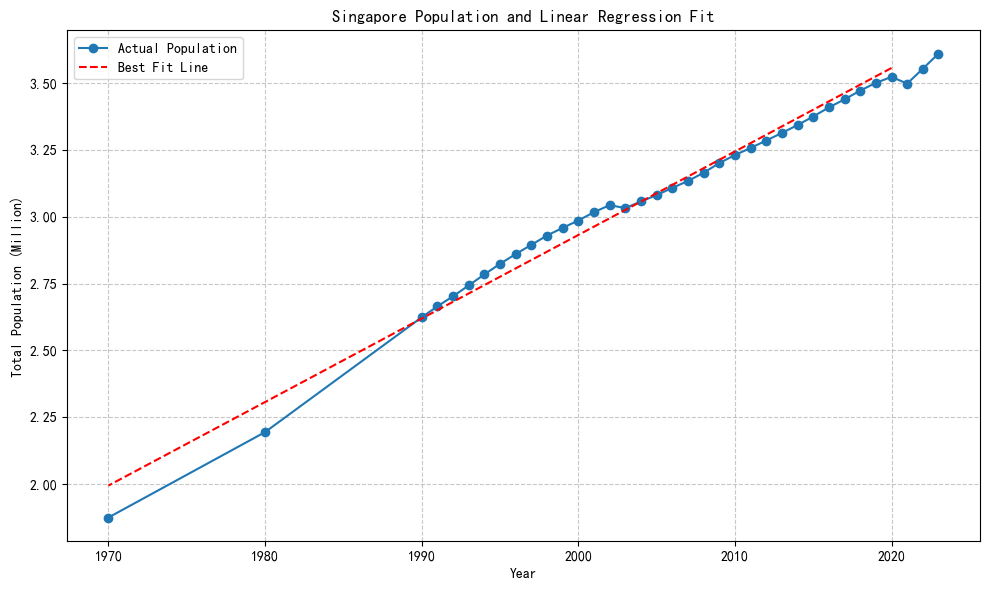

In [17]:
# =========================
# 4. 训练集性能评估
# =========================

slope = model.coef_[0]
intercept = model.intercept_
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f"Best fit line slope: {slope:.2f}")
print(f"Best fit line intercept: {intercept:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Training MSE: {train_mse:.2f}")

# 绘制拟合线
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total_Citizen'] / 1e6, marker='o', label='Actual Population')
plt.plot(train_df['Year'], y_train_pred / 1e6, color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Total Population (Million)')
plt.title('Singapore Population and Linear Regression Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 5）Test predictions and Future Predictions

In [18]:

# =========================
# 5. 测试集预测与评估
# =========================

if len(X_test) > 0:
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Test MSE: {test_mse:.2f}")

    # 输出每年预测值
    for year, real, pred in zip(test_df['Year'], y_test, y_test_pred):
        print(f"{year}: Actual Population = {real:.0f}, Predicted Population = {pred:.0f}")

else:
    print("No test data after 2020.")

Test MSE: 4629235629.86
2023: Actual Population = 3610658, Predicted Population = 3650352
2022: Actual Population = 3553749, Predicted Population = 3619106
2021: Actual Population = 3498191, Predicted Population = 3587860


### China
data resource:<https://data.worldbank.org/indicator/SPPOP.TOTL> 

Use the same implementation method as above

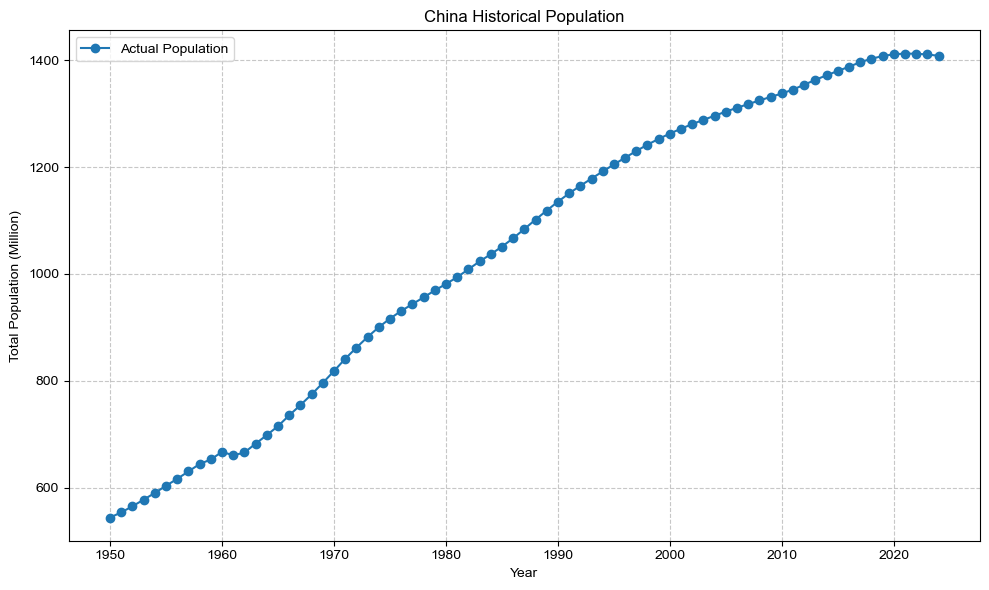

Best fit line slope: 13425525.32
Best fit line intercept: -25625346982.73
Training R²: 0.9846
Training MSE: 1186471912722232.00


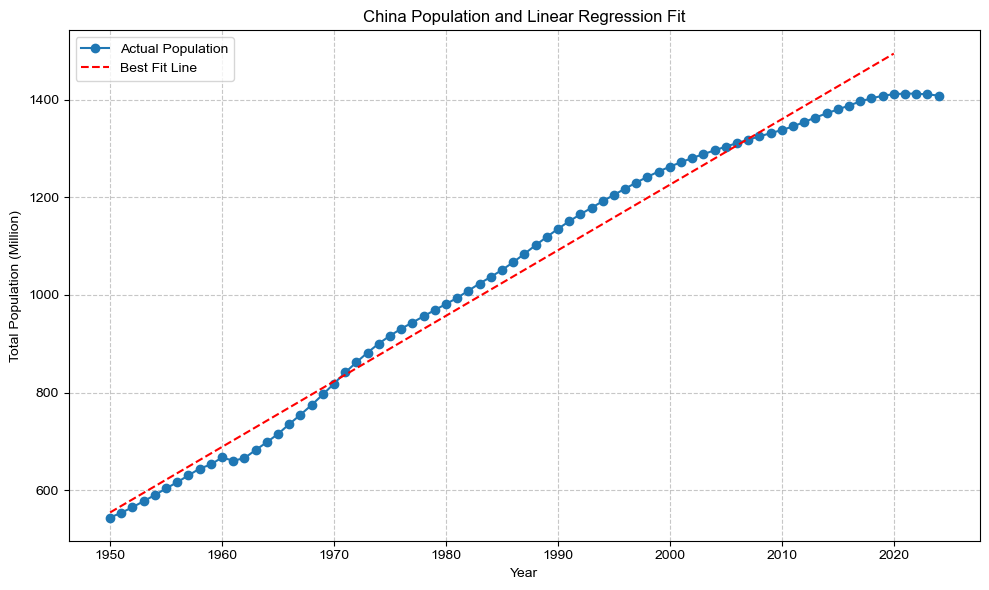

Test MSE: 13938813302451836.00
2021: Actual Population = 1412360000, Predicted Population = 1507639686
2022: Actual Population = 1412175000, Predicted Population = 1521065211
2023: Actual Population = 1410710000, Predicted Population = 1534490737
2024: Actual Population = 1408280000, Predicted Population = 1547916262
Future population predictions:
2025: Predicted Population = 1561341787
2030: Predicted Population = 1628469414
2050: Predicted Population = 1896979920


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 自动设置字体，支持英文和负号
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = ['Arial']
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = ['Helvetica']
else:
    plt.rcParams['font.family'] = ['sans-serif']

plt.rcParams['axes.unicode_minus'] = False

# =========================
# 1. 数据加载与预处理
# =========================

# 读取CSV文件
df = pd.read_csv('chinese.csv')

# 仅保留中国的数据
df = df[df['Country Name'] == 'China']

# 重命名列
df = df.rename(columns={'Year': 'Year', 'Value': 'Total_Citizen'})

# 去除空行和非数字年份
df = df[df['Year'].apply(lambda x: str(x).strip().isdigit())]
df['Year'] = df['Year'].astype(int)
df['Total_Citizen'] = pd.to_numeric(df['Total_Citizen'], errors='coerce')
df = df.dropna()

# 检查是否存在2024年数据
# print("检查是否存在2024年数据：")
# print(df[df['Year'] == 2024])

# =========================
# 2. 人口数据可视化
# =========================

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total_Citizen'] / 1e6, marker='o', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('Total Population (Million)')
plt.title('China Historical Population')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# 3. 构建线性回归模型（使用2020年及以前数据训练）
# =========================

train_df = df[df['Year'] <= 2020]
test_df = df[df['Year'].isin([2021, 2022, 2023, 2024])]

X_train = train_df['Year'].values.reshape(-1, 1)
y_train = train_df['Total_Citizen'].values
X_test = test_df['Year'].values.reshape(-1, 1)
y_test = test_df['Total_Citizen'].values

model = LinearRegression()
model.fit(X_train, y_train)

# =========================
# 4. 训练集性能评估
# =========================

slope = model.coef_[0]
intercept = model.intercept_
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f"Best fit line slope: {slope:.2f}")
print(f"Best fit line intercept: {intercept:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Training MSE: {train_mse:.2f}")

# 绘制拟合线
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total_Citizen'] / 1e6, marker='o', label='Actual Population')
plt.plot(train_df['Year'], y_train_pred / 1e6, color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Total Population (Million)')
plt.title('China Population and Linear Regression Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =========================
# 5. 测试集预测与评估
# =========================

if len(X_test) > 0:
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Test MSE: {test_mse:.2f}")

    # 输出每年预测值
    for year, real, pred in zip(test_df['Year'], y_test, y_test_pred):
        print(f"{year}: Actual Population = {real:.0f}, Predicted Population = {pred:.0f}")
else:
    print("No data for 2021 and later.")

# =========================
# 6. 预测2025、2030、2050年人口
# =========================

future_years = np.array([2025, 2030, 2050]).reshape(-1, 1)
future_predictions = model.predict(future_years)

print("Future population predictions:")
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"{year}: Predicted Population = {pred:.0f}")

## 3.Experimental optimization
From the available data, we know that population growth is not completely linear, but has a trend of slowing down or accelerating. In order to better fit the curve and avoid using other models that we are not yet proficient in, we chose to Optimize the experimental results using polynomial regression








                        === Singapore Polynomial Regression Comparison ===


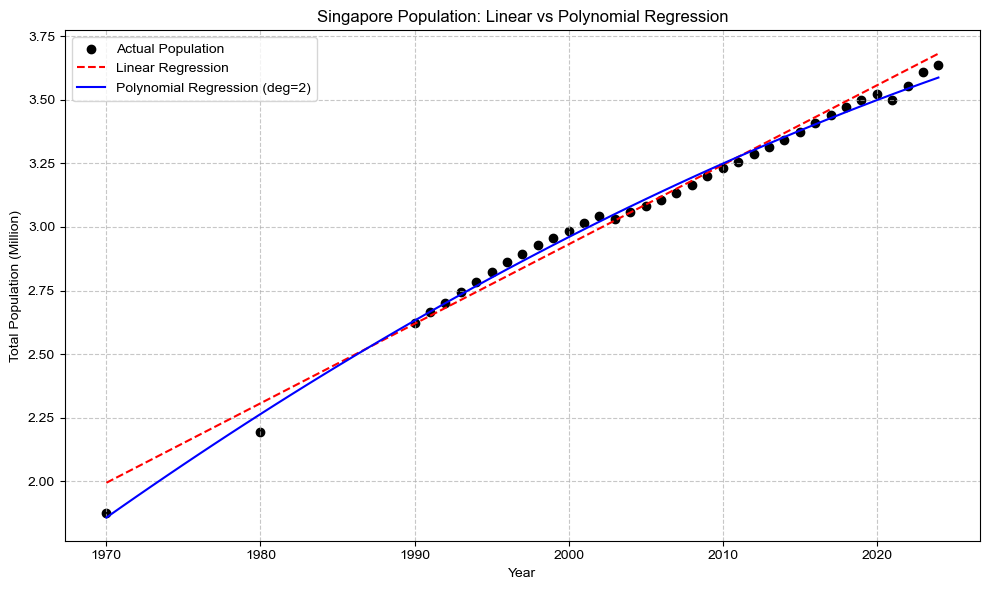

Singapore - Linear Regression Train R²: 0.9854, Test R²: -0.4091
Singapore - Linear Regression Train MSE: 0.0018, Test MSE: 0.0040
Singapore - Polynomial Regression (deg=2) Train R²: 0.9953, Test R²: 0.5587
Singapore - Polynomial Regression (deg=2) Train MSE: 0.0006, Test MSE: 0.0013







                     === China Polynomial Regression Comparison ===


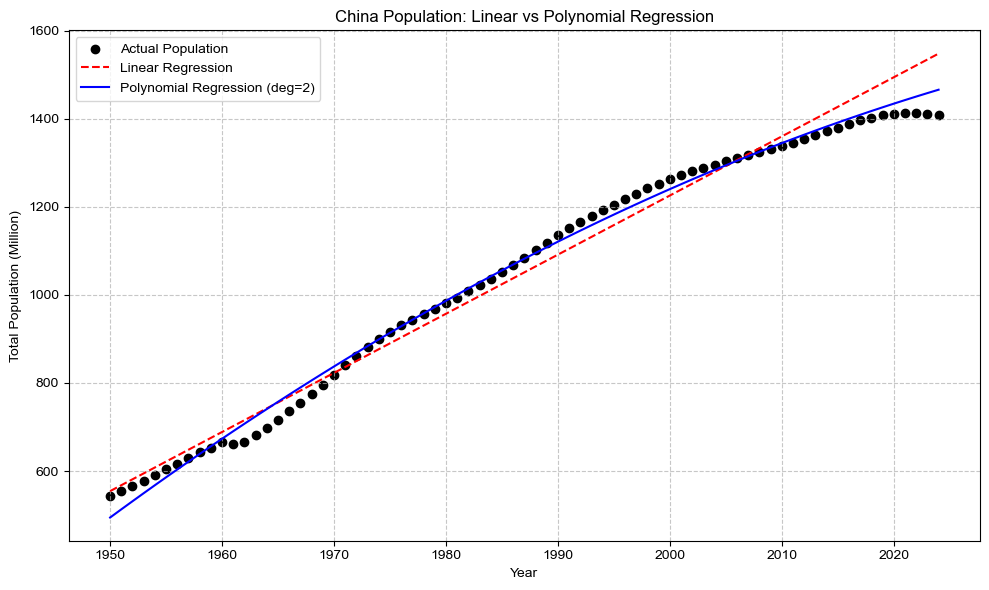

China - Linear Regression Train R²: 0.9846, Test R²: -5231.1308
China - Linear Regression Train MSE: 1186.4719, Test MSE: 13938.8133
China - Polynomial Regression (deg=2) Train R²: 0.9947, Test R²: -744.1751
China - Polynomial Regression (deg=2) Train MSE: 404.0859, Test MSE: 1985.2059


In [26]:
# =========================
# 实验优化：多项式回归对比（含特征中心化与单位统一）
# =========================

from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression_compare(df, country_name, degree=2, split_year=2020, test_years=None):
    # 年份中心化
    df = df.copy()
    df['Year_c'] = df['Year'] - 2000
    # 人口单位统一为百万
    df['Total_Citizen_M'] = df['Total_Citizen'] / 1e6

    # 训练集和测试集划分
    if test_years is None:
        train_df = df[df['Year'] <= split_year]
        test_df = df[df['Year'] > split_year]
    else:
        train_df = df[df['Year'] <= split_year]
        test_df = df[df['Year'].isin(test_years)]
    X_train = train_df['Year_c'].values.reshape(-1, 1)
    y_train = train_df['Total_Citizen_M'].values
    X_test = test_df['Year_c'].values.reshape(-1, 1)
    y_test = test_df['Total_Citizen_M'].values

    # 线性回归
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_train_pred_linear = linear_model.predict(X_train)
    y_test_pred_linear = linear_model.predict(X_test)
    train_mse_linear = mean_squared_error(y_train, y_train_pred_linear)
    train_r2_linear = r2_score(y_train, y_train_pred_linear)
    test_mse_linear = mean_squared_error(y_test, y_test_pred_linear)
    test_r2_linear = r2_score(y_test, y_test_pred_linear)

    # 多项式回归
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_train_pred_poly = poly_model.predict(X_train_poly)
    y_test_pred_poly = poly_model.predict(X_test_poly)
    train_mse_poly = mean_squared_error(y_train, y_train_pred_poly)
    train_r2_poly = r2_score(y_train, y_train_pred_poly)
    test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
    test_r2_poly = r2_score(y_test, y_test_pred_poly)

    # 可视化对比
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Year'], df['Total_Citizen_M'], label='Actual Population', color='black')
    years_plot = np.arange(df['Year'].min(), df['Year'].max() + 1)
    years_plot_c = years_plot - 2000
    plt.plot(years_plot, linear_model.predict(years_plot_c.reshape(-1, 1)), label='Linear Regression', color='red', linestyle='--')
    plt.plot(years_plot, poly_model.predict(poly.transform(years_plot_c.reshape(-1, 1))), label=f'Polynomial Regression (deg={degree})', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Total Population (Million)')
    plt.title(f'{country_name} Population: Linear vs Polynomial Regression')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 输出性能指标
    print(f"{country_name} - Linear Regression Train R²: {train_r2_linear:.4f}, Test R²: {test_r2_linear:.4f}")
    print(f"{country_name} - Linear Regression Train MSE: {train_mse_linear:.4f}, Test MSE: {test_mse_linear:.4f}")
    print(f"{country_name} - Polynomial Regression (deg={degree}) Train R²: {train_r2_poly:.4f}, Test R²: {test_r2_poly:.4f}")
    print(f"{country_name} - Polynomial Regression (deg={degree}) Train MSE: {train_mse_poly:.4f}, Test MSE: {test_mse_poly:.4f}")

# 新加坡多项式回归对比
print("\n")
print("\n")
print("\n")
print("                        === Singapore Polynomial Regression Comparison ===")
df_sg = pd.read_csv('Singapore.csv', skiprows=1)
df_sg = df_sg.rename(columns={df_sg.columns[0]: 'Year', df_sg.columns[1]: 'Total_Citizen'})
df_sg = df_sg[['Year', 'Total_Citizen']]
df_sg = df_sg[df_sg['Year'].apply(lambda x: str(x).strip().isdigit())]
df_sg['Year'] = df_sg['Year'].astype(int)
df_sg['Total_Citizen'] = pd.to_numeric(df_sg['Total_Citizen'], errors='coerce')
df_sg = df_sg.dropna()
polynomial_regression_compare(df_sg, "Singapore", degree=2, split_year=2020)

# 重新加载中国数据，防止变量冲突
df_china = pd.read_csv('chinese.csv')
df_china = df_china[df_china['Country Name'] == 'China']
df_china = df_china.rename(columns={'Year': 'Year', 'Value': 'Total_Citizen'})
df_china = df_china[df_china['Year'].apply(lambda x: str(x).strip().isdigit())]
df_china['Year'] = df_china['Year'].astype(int)
df_china['Total_Citizen'] = pd.to_numeric(df_china['Total_Citizen'], errors='coerce')
df_china = df_china.dropna()

print("\n")
print("\n")
print("\n")
print("\n                     === China Polynomial Regression Comparison ===")
polynomial_regression_compare(df_china, "China", degree=2, split_year=2020, test_years=[2021, 2022, 2023, 2024])

Based on the above data, we find that R2 of polynomial regression is closer to 1 than linear regression, so polynomial regression has a better fitting effect.

At the same time, we noticed that the R2 values in the test set of China data are very exaggerated, which may be due to the magnitude difference of the data (such as the maximum/minimum of some variable values); the values are unstable due to non-normalization, which needs to be improved and optimized by code. However, R2 approaches 1 to the greatest extent, which still means that polynomial regression is better.